# Final Pipeline

Goal is to get number of objects that would have been called stars if survey properties were constant. This will use the binning approach to calculating probability functions, and no PCA will be used, which should hopefully speed up the process substantially, especially when expanding to the full sky.

Note, everything is done at a full 4096 resolution.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import astropy.io.fits as fits
from astropy.table import Table
import healpy as hp
import healsparse as hsp
import skyproj
from os import listdir
import astropy.units as u
from astropy.coordinates import SkyCoord
import Config
import StellarConfig as strConfig
from CropSurveyProperties import *
from GetObjects import *
from Classification import *
from Detection import *

## Hyper Parameters

In [2]:
res = strConfig.res
numMagBins = strConfig.numMagBins
numBins = strConfig.numBins
classCutoff = strConfig.classCutoff
goldCols = strConfig.goldCols
gCut = strConfig.gCut
magBins = strConfig.magBins
cutOffPercent = strConfig.cutOffPercent
binNum = strConfig.binNum

deepCols = strConfig.deepCols

## Isochrone Configuration

In [3]:
path = strConfig.path
mu = strConfig.mu

## Files

In [4]:
matBalrGalaFile = strConfig.matBalrGalaFile
detBalrGalaFile = strConfig.detBalrGalaFile
matBalrStarFile = strConfig.matBalrStarFile
detBalrStarFile = strConfig.detBalrStarFile

matGalaFile = strConfig.matGalaFile
detGalaAllPosFile = strConfig.detGalaAllPosFile

matStarFile = strConfig.matStarFile
detStarAllPosFile = strConfig.detStarAllPosFile

deepFiles = strConfig.deepFiles

origCondFiles = strConfig.origCondFiles
stelFile = strConfig.stelFile
pixFile = strConfig.pixFile
condFiles = strConfig.condFiles

galaExtrFiles = strConfig.galaExtrFiles
galaTrainFiles = strConfig.galaTrainFiles
galaProbFiles = strConfig.galaProbFiles

galaDetAsStarExtrFiles = strConfig.galaDetAsStarExtrFiles
galaDetAsStarTrainFiles = strConfig.galaDetAsStarTrainFiles
galaDetAsStarProbFiles = strConfig.galaDetAsStarProbFiles

galaDetAsGalaExtrFiles = strConfig.galaDetAsGalaExtrFiles
galaDetAsGalaTrainFiles = strConfig.galaDetAsGalaTrainFiles
galaDetAsGalaProbFiles = strConfig.galaDetAsGalaProbFiles

starExtrFiles = strConfig.starExtrFiles
starTrainFiles = strConfig.starTrainFiles
starProbFiles = strConfig.starProbFiles

starDetAsStarExtrFiles = strConfig.starDetAsStarExtrFiles
starDetAsStarTrainFiles = strConfig.starDetAsStarTrainFiles
starDetAsStarProbFiles = strConfig.starDetAsStarProbFiles

starDetAsGalaExtrFiles = strConfig.starDetAsGalaExtrFiles
starDetAsGalaTrainFiles = strConfig.starDetAsGalaTrainFiles
starDetAsGalaProbFiles = strConfig.starDetAsGalaProbFiles

goldStarFiles = strConfig.goldStarFiles
goldGalaFiles = strConfig.goldGalaFiles

goldObjectsDir = strConfig.goldObjectsDir
goldObjectsFiles = strConfig.goldObjectsFiles

goldMoreInfoStarFiles = strConfig.goldMoreInfoStarFiles
goldMoreInfoGalaFiles = strConfig.goldMoreInfoGalaFiles

calibrationFile = strConfig.calibrationFile

## Get Pixels and Conditions

In [5]:
# validPixCropData(origCondFiles, stelFile, pixFile, condFiles)

In [6]:
validPix = fitsio.read(pixFile)['PIXEL']
pixCheck = np.full(12*(res**2), False, dtype = bool)
pixCheck[validPix] = True

## Get Synthetic Objects

In [7]:
# Get Stars:
# getMatStars(path, mu, matBalrStarFile, detBalrStarFile, pixFile, matStarFile, gCut, classCutoff)
# getDetStarPositions(detBalrStarFile, pixFile, detStarAllPosFile)

# Get Galaxies:
# getMatGalas(path, mu, deepFiles, matBalrGalaFile, detBalrGalaFile, pixFile, matGalaFile, gCut, classCutoff)
# getDetGalaPositions(deepFiles, detBalrGalaFile, pixFile, detGalaAllPosFile)

## Training

### Correct Classification Probabilities:

In [8]:
# Stars
# singleCorrectionTrain(matStarFile, condFiles, pixFile, magBins, starTrainFiles, starProbFiles, starExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent)
# # fullSky(pixFile, condFiles, np.array([starTrainFiles[2]]), np.array([starProbFiles[2]]), np.array([starExtrFiles[2]]), res, numBins)

# Galaxies
# singleCorrectionTrain(matGalaFile, condFiles, pixFile, magBins, galaTrainFiles, galaProbFiles, galaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent)
# # fullSky(pixFile, condFiles, np.array([galaTrainFiles[1], galaTrainFiles[2]]), np.array([galaProbFiles[1], galaProbFiles[2]]), np.array([galaExtrFiles[1], galaExtrFiles[2]]), res, numBins)

In [9]:
# aveAcc = loadtxt(galaTrainFiles[0][0:-5] + '_Ave_Acc.csv', delimiter=',')
# aveAcc = 1 * aveAcc

# prob_table = Table()
# prob_table['SIGNAL'] = aveAcc * np.ones(len(validPix))
# prob_table.write(galaProbFiles[0], overwrite = True) 

# ext_table = Table()
# ext_table['EXTRAPOLATIONS'] = np.zeros(len(validPix))
# ext_table.write(galaExtrFiles[0], overwrite = True)

### Detection Rate Variations:

In [10]:
# singleCorrectionTrainDet(detStarAllPosFile, matStarFile, condFiles, pixFile, magBins, starDetAsStarTrainFiles, starDetAsStarProbFiles, starDetAsStarExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent)
# progresses = [False, True, True]
# startInds = [0, 25, 50, 75]
# endInds = [24, 49, 74, 99]

# for i in range(3):
#     for j in range(4):
#         fullSkyDet(pixFile, condFiles, np.array([starDetAsStarTrainFiles[i]]), np.array([starDetAsStarProbFiles[i]]), np.array([starDetAsStarExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j], showProgress = progresses[i])

In [11]:
# singleCorrectionTrainDet(detGalaAllPosFile, matGalaFile, condFiles, pixFile, magBins, galaDetAsStarTrainFiles, galaDetAsStarProbFiles, galaDetAsStarExtrFiles, numBins, res, True, classCutoff, binNum, cutOffPercent)
# progresses = [True, False, False]
# startInds = 2 * np.arange(50)
# endInds = (2 * np.arange(50)) + 1

# for i in range(3):
#     for j in range(50):
#         fullSkyDet(pixFile, condFiles, np.array([galaDetAsStarTrainFiles[i]]), np.array([galaDetAsStarProbFiles[i]]), np.array([galaDetAsStarExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j], showProgress = progresses[i])

# UNCOMMENT BELOW CODE

Must be run in one go, will take ~10 hours.

In [12]:
# # singleCorrectionTrainDet(detStarAllPosFile, matStarFile, condFiles, pixFile, magBins, starDetAsGalaTrainFiles, starDetAsGalaProbFiles, starDetAsGalaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent, doFullSky = False)
# progresses = [False, False, False]
# startInds = 2 * np.arange(50)
# endInds = (2 * np.arange(50)) + 1

# for i in range(3):
#     for j in range(50):
#         fullSkyDet(pixFile, condFiles, np.array([starDetAsGalaTrainFiles[i]]), np.array([starDetAsGalaProbFiles[i]]), np.array([starDetAsGalaExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j], showProgress = progresses[i])

In [13]:
# singleCorrectionTrainDet(detGalaAllPosFile, matGalaFile, condFiles, pixFile, magBins, galaDetAsGalaTrainFiles, galaDetAsGalaProbFiles, galaDetAsGalaExtrFiles, numBins, res, False, classCutoff, binNum, cutOffPercent, doFullSky = False)
# progresses = [False, False, False]
# startInds = 2 * np.arange(50)
# endInds = (2 * np.arange(50)) + 1

# for i in range(3):
#     for j in range(50):
#         fullSkyDet(pixFile, condFiles, np.array([galaDetAsGalaTrainFiles[i]]), np.array([galaDetAsGalaProbFiles[i]]), np.array([galaDetAsGalaExtrFiles[i]]), res, numBins, startInd = startInds[j], endInd = endInds[j], showProgress = progresses[i])

## Get Gold Objects

In [14]:
# StarPIX = []
# GalaPIX = []

# StarRA = []
# StarDEC = []

# GalaRA = []
# GalaDEC = []

# StarRMAG = []
# StarGMAG = []

# GalaRMAG = []
# GalaGMAG = []

# for _ in range(numMagBins):
    
#     StarPIX.append(np.array([]))
#     StarRA.append(np.array([]))
#     StarDEC.append(np.array([]))
#     StarRMAG.append(np.array([]))
#     StarGMAG.append(np.array([]))
    
#     GalaPIX.append(np.array([]))
#     GalaRA.append(np.array([]))
#     GalaDEC.append(np.array([]))
#     GalaRMAG.append(np.array([]))
#     GalaGMAG.append(np.array([]))
    
# for j in range(len(goldObjectsFiles)):
#     if j%100 == 0:
#         print(j)
#     obsData = fitsio.read(goldObjectsDir + goldObjectsFiles[j], columns = goldCols)
#     FOREGROUND = obsData[goldCols[0]]
#     BADREGIONS = obsData[goldCols[1]]
#     FOOTPRINT = obsData[goldCols[2]]
#     CLASS = obsData[goldCols[3]]
#     GMAG = obsData[goldCols[4]]
#     RMAG = obsData[goldCols[5]]
#     GMAG_GALA = obsData[goldCols[6]]
#     RMAG_GALA = obsData[goldCols[7]]
#     RA = obsData[goldCols[8]]
#     DEC = obsData[goldCols[9]]
#     PIX = hp.ang2pix(res, RA, DEC, lonlat = True, nest = True)

#     # General Quality Cuts
#     qualityCut = np.where((FOREGROUND == 0) &
#                           (BADREGIONS < 2) &
#                           (FOOTPRINT == 1) &
#                           (pixCheck[PIX]))[0]

#     CLASS = CLASS[qualityCut]
#     GMAG = GMAG[qualityCut]
#     RMAG = RMAG[qualityCut]
#     GMAG_GALA = GMAG_GALA[qualityCut]
#     RMAG_GALA = RMAG_GALA[qualityCut]
#     PIX = PIX[qualityCut]
#     RA = RA[qualityCut]
#     DEC = DEC[qualityCut]

#     # Observed Star Objects

#     blueStarCut = np.where((CLASS <= classCutoff) & 
#                       (CLASS >= 0) &
#                       (GMAG < gCut))[0]

#     STARRA = RA[blueStarCut]
#     STARDEC = DEC[blueStarCut]
#     STARPIX = PIX[blueStarCut]
#     STARGMAG = GMAG[blueStarCut]
#     STARRMAG = RMAG[blueStarCut]
    
#     for i in np.arange(numMagBins):
#         minRMAG = magBins[i]
#         maxRMAG = magBins[i + 1]
#         magCut = np.where((STARRMAG <= maxRMAG) & (STARRMAG > minRMAG))[0]
        
#         magStarRa = STARRA[magCut]
#         magStarDec = STARDEC[magCut]
#         magStarGmag = STARGMAG[magCut]
#         magStarRmag = STARRMAG[magCut]
#         magStarPix = STARPIX[magCut]

#         isoStarCut = Path.contains_points(path,np.vstack((magStarGmag - magStarRmag, magStarGmag - mu)).T)

#         StarRA[i] = np.append(StarRA[i], magStarRa[isoStarCut])
#         StarDEC[i] = np.append(StarDEC[i], magStarDec[isoStarCut])
#         StarPIX[i] = np.append(StarPIX[i], magStarPix[isoStarCut])
#         StarRMAG[i] = np.append(StarRMAG[i], magStarRmag[isoStarCut])
#         StarGMAG[i] = np.append(StarGMAG[i], magStarGmag[isoStarCut])

#     # Observed Galaxy Objects

#     blueGalaCut = np.where((CLASS <= 3) & 
#                       (CLASS >= classCutoff) &
#                       (GMAG_GALA < gCut))[0]

#     GALARA = RA[blueGalaCut]
#     GALADEC = DEC[blueGalaCut]
#     GALAPIX = PIX[blueGalaCut]
#     GALAGMAG = GMAG_GALA[blueGalaCut]
#     GALARMAG = RMAG_GALA[blueGalaCut]
    
#     for i in np.arange(numMagBins):
        
#         minRMAG = magBins[i]
#         maxRMAG = magBins[i + 1]
#         magCut = np.where((GALARMAG <= maxRMAG) & (GALARMAG > minRMAG))[0]
        
#         magGalaRa = GALARA[magCut]
#         magGalaDec = GALADEC[magCut]
#         magGalaGmag = GALAGMAG[magCut]
#         magGalaRmag = GALARMAG[magCut]
#         magGalaPix = GALAPIX[magCut]

#         isoGalaCut = Path.contains_points(path,np.vstack((magGalaGmag - magGalaRmag, magGalaGmag - mu)).T)

#         GalaRA[i] = np.append(GalaRA[i], magGalaRa[isoGalaCut])
#         GalaDEC[i] = np.append(GalaDEC[i], magGalaDec[isoGalaCut])
#         GalaPIX[i] = np.append(GalaPIX[i], magGalaPix[isoGalaCut])
#         GalaRMAG[i] = np.append(GalaRMAG[i], magGalaRmag[isoGalaCut])
#         GalaGMAG[i] = np.append(GalaGMAG[i], magGalaGmag[isoGalaCut])

# for i in range(numMagBins):
#     my_table = Table()
#     my_table['RA'] = StarRA[i].astype(float)
#     my_table['DEC'] = StarDEC[i].astype(float)
#     my_table['RMAG'] = StarRMAG[i].astype(float)
#     my_table['GMAG'] = StarGMAG[i].astype(float)
#     my_table.write(goldMoreInfoStarFiles[i], overwrite = True)
    
#     my_table = Table()
#     my_table['RA'] = GalaRA[i].astype(float)
#     my_table['DEC'] = GalaDEC[i].astype(float)
#     my_table['RMAG'] = GalaRMAG[i].astype(float)
#     my_table['GMAG'] = GalaGMAG[i].astype(float)
#     my_table.write(goldMoreInfoGalaFiles[i], overwrite = True)

In [15]:
# for j in np.arange(len(StarPIX)):

#     starPixRepeats = StarPIX[j]

#     # This will be used to store the number of stars at each pixel.
#     starPix, starDet = np.unique(starPixRepeats, return_counts = True) # The unique pixels, with no repeats.
    
#     fullSkyStars = np.full(12*(res**2), 0.0)
#     fullSkyStars[starPix.astype(int)] = starDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyStars[validPix]
#     my_table.write(goldStarFiles[j], overwrite = True)

In [16]:
# for j in np.arange(len(GalaPIX)):

#     galaPixRepeats = GalaPIX[j]

#     # This will be used to store the number of stars at each pixel.
#     galaPix, galaDet = np.unique(galaPixRepeats, return_counts = True) # The unique pixels, with no repeats.

#     fullSkyGalas = np.full(12*(res**2), 0.0)
#     fullSkyGalas[galaPix.astype(int)] = galaDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyGalas[validPix]
#     my_table.write(goldGalaFiles[j], overwrite = True)

## Deep Field Calibrations

In [17]:
def findMatches(angleCutoff, RASource, DECSource, RAMatchCatalog, DECMatchCatalog, nthneighbor=1):
    c = SkyCoord(ra=RASource*u.degree, dec=DECSource*u.degree)
    catalog = SkyCoord(ra=RAMatchCatalog*u.degree, dec=DECMatchCatalog*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog, nthneighbor=nthneighbor)
    matches = d2d < angleCutoff
    return matches, d2d

In [18]:
# deepRA = np.array([])
# deepDEC = np.array([])
# deepClass = np.array([])
# deepFlag = np.array([])
# deepFlagNir = np.array([])

# for deepFile in deepFiles:
#     deepData = fitsio.read(deepFile, columns = deepCols)

#     deepRA = np.append(deepRA, deepData['RA'])
#     deepDEC = np.append(deepDEC, deepData['DEC'])
#     deepClass = np.append(deepClass, deepData['KNN_CLASS'])
#     deepFlag = np.append(deepFlag, deepData['MASK_FLAGS'])
#     deepFlagNir = np.append(deepFlagNir, deepData['MASK_FLAGS_NIR'])

# deepFlagCuts = np.where((deepFlag == 0) &
#                         (deepFlagNir == 0) &
#                         (deepRA < 120) &
#                         (deepClass > 0) &
#                         (deepClass <= 3))[0]

# deepRA = deepRA[deepFlagCuts]
# deepDEC = deepDEC[deepFlagCuts]
# deepClass = deepClass[deepFlagCuts]

# if len(np.where(deepClass == 3)[0]) != 0:
#     print('WARNING: Objects with no class are present in this deep field selection. ' + str(len(np.where(deepClass == 3)[0])) + ' object(s) out of ' + str(len(deepClass)) + ' have an ambiguous classification.')

# deepPix = np.unique(hp.ang2pix(res, deepRA, deepDEC, lonlat = True, nest = True))

# deepPixCheck = np.full(12*(res**2), False, dtype = bool)
# deepPixCheck[deepPix] = True

In [19]:
# starAdjustments = []
# galaAdjustments = []

# for i in np.arange(len(goldMoreInfoStarFiles)):
#     allStarData = fitsio.read(goldMoreInfoStarFiles[i])
#     allStarRA = allStarData['RA']
#     allStarDEC = allStarData['DEC']
#     allStarPIX = hp.ang2pix(res, allStarRA, allStarDEC, lonlat = True, nest = True)
#     allStarRA = allStarRA[np.where(deepPixCheck[allStarPIX])[0]]
#     allStarDEC = allStarDEC[np.where(deepPixCheck[allStarPIX])[0]]
#     print(len(allStarRA))

#     allGalaData = fitsio.read(goldMoreInfoGalaFiles[i])
#     allGalaRA = allGalaData['RA']
#     allGalaDEC = allGalaData['DEC']
#     allGalaPIX = hp.ang2pix(res, allGalaRA, allGalaDEC, lonlat = True, nest = True)
#     allGalaRA = allGalaRA[np.where(deepPixCheck[allGalaPIX])[0]]
#     allGalaDEC = allGalaDEC[np.where(deepPixCheck[allGalaPIX])[0]]
#     print(len(allGalaRA))
    
#     deepStarMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allStarRA, allStarDEC)
#     deepGalaMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allGalaRA, allGalaDEC)

#     matchedDeepStarRA = deepRA[deepStarMatches]
#     matchedDeepStarDEC = deepDEC[deepStarMatches]
#     matchedDeepStarClass = deepClass[deepStarMatches]

#     matchedDeepGalaRA = deepRA[deepGalaMatches]
#     matchedDeepGalaDEC = deepDEC[deepGalaMatches]
#     matchedDeepGalaClass = deepClass[deepGalaMatches]
    
#     TSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 2)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 2)[0]], lonlat = True, nest = True)
#     FSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 1)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 1)[0]], lonlat = True, nest = True)

#     TGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 1)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 1)[0]], lonlat = True, nest = True)
#     FGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 2)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 2)[0]], lonlat = True, nest = True)
    
#     print(len(TSPIX))
#     print(len(FGPIX))
#     print(len(TGPIX))
#     print(len(FSPIX))
#     print(' ')
    
#     starCorrProb = np.clip(fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1)
#     fullStarProb = np.full(12*(res**2), hp.UNSEEN)
#     fullStarProb[validPix] = starCorrProb

#     galaCorrProb = np.clip(fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1)
#     fullGalaProb = np.full(12*(res**2), hp.UNSEEN)
#     fullGalaProb[validPix] = galaCorrProb
    
#     starAdjustments.append(len(TSPIX) / (np.sum(fullStarProb[TSPIX[np.where(pixCheck[TSPIX])[0]]]) + np.sum(fullStarProb[FGPIX[np.where(pixCheck[FGPIX])[0]]])))   
#     galaAdjustments.append(len(TGPIX) / (np.sum(fullGalaProb[TGPIX[np.where(pixCheck[TGPIX])[0]]]) + np.sum(fullGalaProb[FSPIX[np.where(pixCheck[FSPIX])[0]]])))
    
# caliTable = Table()
# caliTable['STAR'] = starAdjustments
# caliTable['GALA'] = galaAdjustments
# caliTable.write(calibrationFile, overwrite = True)

In [20]:
caliData = fitsio.read(calibrationFile)
starAdjustments = caliData['STAR']
galaAdjustments = caliData['GALA']

In [21]:
claStar = []
    
for goldStarFile in goldStarFiles:
    claStar.append(fitsio.read(goldStarFile)['SIGNAL'])
    
claStar = np.array(claStar, dtype = object)

claGala = []

for goldGalaFile in goldGalaFiles:
    claGala.append(fitsio.read(goldGalaFile)['SIGNAL'])
    
claGala = np.array(claGala, dtype = object)

In [22]:
starDetAsStarProb = []
for i in range(len(goldStarFiles)):
    nextProb = fitsio.read(starDetAsStarProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    starDetAsStarProb.append(nextProb)
starDetAsStarProb = np.array(starDetAsStarProb, dtype = object)

# starDetAsGalaProb = []
# for i in range(len(goldStarFiles)):
#     nextProb = fitsio.read(starDetAsGalaProbFiles[i])['SIGNAL']
#     nextProb[np.where(nextProb < 0)[0]] = 0
#     starDetAsGalaProb.append(nextProb)
# starDetAsGalaProb = np.array(starDetAsGalaProb, dtype = object)

starCorrProb = []
for i in range(len(goldStarFiles)):
    starCorrProb.append(np.clip(starAdjustments[i] * fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1))
starCorrProb = np.array(starCorrProb, dtype = object)

galaDetAsStarProb = []
for i in range(len(goldGalaFiles)):
    nextProb = fitsio.read(galaDetAsStarProbFiles[i])['SIGNAL']
    nextProb[np.where(nextProb < 0)[0]] = 0
    galaDetAsStarProb.append(nextProb)
galaDetAsStarProb = np.array(galaDetAsStarProb, dtype = object)

# galaDetAsGalaProb = []
# for i in range(len(goldGalaFiles)):
#     nextProb = fitsio.read(galaDetAsGalaProbFiles[i])['SIGNAL']
#     nextProb[np.where(nextProb < 0)[0]] = 0
#     galaDetAsGalaProb.append(nextProb)
# galaDetAsGalaProb = np.array(galaDetAsGalaProb, dtype = object)

galaCorrProb = []
for i in range(len(goldGalaFiles)):
    galaCorrProb.append(np.clip(galaAdjustments[i] * fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1))
galaCorrProb = np.array(galaCorrProb, dtype = object)

## Notes on Next Four

These next four blocks of code can be used somewhat to analyze the validity of assuming that the structure of the probability maps in general is not finer than a 512 pixel resolution. 

In [23]:
# origProbMap = np.full(12*(res**2), hp.UNSEEN)
# origProbMap[validPix] = galaDetAsStarProb[0]
# degProbMap = hp.ud_grade(origProbMap, 512, order_in = 'NESTED', order_out = 'NESTED')
# nside_coverage = 32
# hspProb = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=degProbMap)

In [24]:
# testMap = hp.ud_grade(degProbMap, 4096, order_in = 'NESTED', order_out = 'NESTED')

In [25]:
# differences = testMap[validPix] - origProbMap[validPix]
# print(np.average(differences))
# print(np.std(differences))

In [26]:
# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspProb, cmap = 'viridis')
# plt.clim(0.75, 1)
# plt.colorbar(location = 'bottom', label = 'Relative Probability')
# fig.suptitle(r'Star Detected as Star Probability, $r\leq 24.5$')
# plt.show()

## Fraction Covered

This looks at fracDet data. Degradation is done to a resolution of 512.

In [27]:
# This generates the fracDet data.
fracFile = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/fracdet/y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz'
fracData = fitsio.read(fracFile)

# This degrades it to 512 resolution and applies a cut to where there is at least 75% coverage.
fracPix = fracData['PIXEL']
fracDet = fracData['SIGNAL']
origFracMap = np.full(12*(4096**2), 0.0)
origFracMap[fracPix] = fracDet
origFracMap[~pixCheck] = 0.0 # If we aren't looking at the pixel, effective cover of 0%
fracMap = hp.ud_grade(origFracMap, 512, order_in = 'NESTED', order_out = 'NESTED')
fracPix = np.where(fracMap >= 0.5)[0]

### Plots out the fracDet Map

In [28]:
# fracTest = np.full(12*(512**2), hp.UNSEEN)
# fracTest[fracPix] = fracMap[fracPix]

# nside_coverage = 32
# hspFrac = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fracTest)

# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
# sp.draw_hspmap(hspFrac, cmap = 'gray_r')
# plt.clim(0, 1)
# plt.colorbar(location = 'bottom', label = 'Fraction Covered')
# fig.suptitle(r'FracDet Map')
# plt.show()

## Converting to fracPix from validPix

At this stage, when degrading it will be simpler to remain in 512 resolution. The new "validPix" type object in this resolution has been named "fracPix". Degradation will be done. Classified stars and galaxies should immediately be corrected for with the fracDet map to save some time, which is always nice. Probabilities will also be degraded. For these, DO NOT USE THE FRACDET MAP. Instead, degrade with all other pixels as hp.UNSEEN.

As a note, this could potentially introduce issues. For a simple example of why, suppose that the superpixel is composed of only 2 subpixels. One of them originally had 50% coverage, the other originally had 100% coverage. If both were valid pixels but with vastly different probabilities, simply taking the average could be problematic. A weighted average would in this case be more appropriate, but either solution likely has issues.

Throughout the process of degrading though, we are inherently making the assumption that these probabilities are relatively stable on such small angular scales. This overall seems to be a reasonable assumption. With this in mind, a weighted average will be used to degrade probabilities with the knowledge that this still unfortunately has inherent issues.

In [29]:
deClaStar = []

for i in range(len(claStar)):
    
    fullClaStar = np.zeros(12*(res**2))
    fullClaStar[validPix] = claStar[i]
    deClaStarInd = hp.ud_grade(fullClaStar, 512, order_in = 'NESTED', order_out = 'NESTED')
    
    deClaStar.append((deClaStarInd[fracPix] / fracMap[fracPix]) * ((res / 512)**2))
    
deClaStar = np.array(deClaStar, dtype = object)

In [30]:
deClaGala = []

for i in range(len(claGala)):
    
    fullClaGala = np.zeros(12*(res**2))
    fullClaGala[validPix] = claGala[i]
    deClaGalaInd = hp.ud_grade(fullClaGala, 512, order_in = 'NESTED', order_out = 'NESTED')
    
    deClaGala.append((deClaGalaInd[fracPix] / fracMap[fracPix]) * ((res / 512)**2))
    
deClaGala = np.array(deClaGala, dtype = object)

In [31]:
deStarDetAsStarProb = []
for i in range(len(starDetAsStarProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = starDetAsStarProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
    deStarDetAsStarProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deStarDetAsStarProb = np.array(deStarDetAsStarProb, dtype = object)

In [32]:
# deStarDetAsGalaProb = []
# for i in range(len(starDetAsGalaProb)):
    
#     fullProb = np.zeros(12*(res**2))
#     fullProb[validPix] = starDetAsGalaProb[i] * origFracMap[validPix]
    
#     deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
#     deStarDetAsGalaProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
# deStarDetAsGalaProb = np.array(deStarDetAsGalaProb, dtype = object)

In [33]:
deStarCorrProb = []
for i in range(len(starCorrProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = starCorrProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
    deStarCorrProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deStarCorrProb = np.array(deStarCorrProb, dtype = object)

In [34]:
deGalaDetAsStarProb = []
for i in range(len(galaDetAsStarProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = galaDetAsStarProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
    deGalaDetAsStarProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deGalaDetAsStarProb = np.array(deGalaDetAsStarProb, dtype = object)

In [35]:
# deGalaDetAsGalaProb = []
# for i in range(len(galaDetAsGalaProb)):
    
#     fullProb = np.zeros(12*(res**2))
#     fullProb[validPix] = galaDetAsGalaProb[i] * origFracMap[validPix]
    
#     deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
#     deGalaDetAsGalaProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
# deGalaDetAsGalaProb = np.array(deGalaDetAsGalaProb, dtype = object)

In [36]:
deGalaCorrProb = []
for i in range(len(galaCorrProb)):
    
    fullProb = np.zeros(12*(res**2))
    fullProb[validPix] = galaCorrProb[i] * origFracMap[validPix]
    
    deFullProb = hp.ud_grade(fullProb, 512, order_in = 'NESTED', order_out = 'NESTED')
    deGalaCorrProb.append(deFullProb[fracPix] / fracMap[fracPix])
    
deGalaCorrProb = np.array(deGalaCorrProb, dtype = object)

## Getting Original Counts

In [37]:
origStar = np.full(len(fracPix), 0.0)
for i in np.arange(numMagBins):
    origStar = origStar + deClaStar[i]
    
origGala = np.full(len(fracPix), 0.0)
for i in np.arange(numMagBins):
    origGala = origGala + deClaGala[i]

## Making Corrections

In [38]:
corrStarBins = []
corrGalaBins = []
for i in np.arange(numMagBins):
    
    obsStars = (((deGalaCorrProb[i] * deClaStar[i]) + ((deGalaCorrProb[i] - 1) * deClaGala[i])) / ((deStarCorrProb[i] + deGalaCorrProb[i] - 1))).astype(float)
    obsStars[np.where(obsStars < 0)] = 0
    obsStars[np.where(obsStars >= deClaStar[i] + deClaGala[i])] = deClaStar[i][np.where(obsStars >= deClaStar[i] + deClaGala[i])] + deClaGala[i][np.where(obsStars >= deClaStar[i] + deClaGala[i])]
    
    obsGalas = deClaStar[i] + deClaGala[i] - obsStars
    
    CsfOs = obsStars * deStarCorrProb[i]
    CsfOg = obsGalas * (1 - deGalaCorrProb[i])
    
    CgfOs = obsStars * (1 - deStarCorrProb[i])
    CgfOg = obsGalas * deGalaCorrProb[i]
    
    CsfOsCorr = CsfOs / (deStarDetAsStarProb[i].astype(float))
    CsfOgCorr = CsfOg / (deGalaDetAsStarProb[i].astype(float))
    
    # CgfOsCorr = CgfOs / (deStarDetAsGalaProb[i].astype(float))
    # CgfOgCorr = CgfOg / (deGalaDetAsGalaProb[i].astype(float))
    
    corrStarBins.append(CsfOsCorr + CsfOgCorr)
    # corrGalaBins.append(CgfOsCorr + CgfOgCorr)

In [39]:
corrStar = np.sum(corrStarBins, axis = 0)
# corrGala = np.sum(corrGalaBins, axis = 0)

## Crops to Phoenix

In [40]:
phoRa, phoDec = hp.pixelfunc.pix2ang(512, np.arange(12*(512**2)), nest=True, lonlat=True)
phoPix = np.full(12*(512**2), False, dtype = bool)
phoPix[np.where((phoRa >= 15) & (phoRa <= 35) & (phoDec >= -60) & (phoDec <= -40))[0]] = True

In [41]:
smoothSigma = .15 * np.pi / 180

fullOrigStar = np.full(12*(512**2), hp.UNSEEN)
fullOrigStar[fracPix] = origStar
fullOrigStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

fullOrigStar[~phoPix] = hp.UNSEEN
smoothingWeights = np.zeros(12*(512**2))
smoothingWeights[np.where(fullOrigStar > 0)[0]] = 1
smoothingWeights = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(smoothingWeights, n2r = True), sigma = smoothSigma), r2n = True)
fullOrigStar = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullOrigStar, n2r = True), sigma = smoothSigma), r2n = True)
fullOrigStar[np.where(fullOrigStar > 0)[0]] = fullOrigStar[np.where(fullOrigStar > 0)[0]] / smoothingWeights[np.where(fullOrigStar > 0)[0]]

fullCorrStar = np.full(12*(512**2), hp.UNSEEN)
fullCorrStar[fracPix] = corrStar
fullCorrStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

fullCorrStar = hp.pixelfunc.reorder(hp.sphtfunc.smoothing(hp.pixelfunc.reorder(fullCorrStar, n2r = True), sigma = smoothSigma), r2n = True)
fullCorrStar[np.where(fullOrigStar > 0)[0]] = fullCorrStar[np.where(fullOrigStar > 0)[0]] / smoothingWeights[np.where(fullOrigStar > 0)[0]]

In [42]:
# fullOrigGala = np.full(12*(512**2), hp.UNSEEN)
# fullOrigGala[fracPix] = origGala
# fullOrigGala[np.where(fullOrigGala <= 0)[0]] = hp.UNSEEN

# fullCorrGala = np.full(12*(512**2), hp.UNSEEN)
# fullCorrGala[fracPix] = corrGala
# fullCorrGala[np.where(fullOrigGala <= 0)[0]] = hp.UNSEEN

## Displaying Results

In [43]:
nside_coverage = 32

hspStarCorr = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullCorrStar)
hspStarOrig = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullOrigStar)

# hspGalaCorr = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullCorrGala)
# hspGalaOrig = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullOrigGala)

In [44]:
starMin = 15
starMax = 35

# starMin = 0
# starMax = 75

galaMin = 50
galaMax = 150

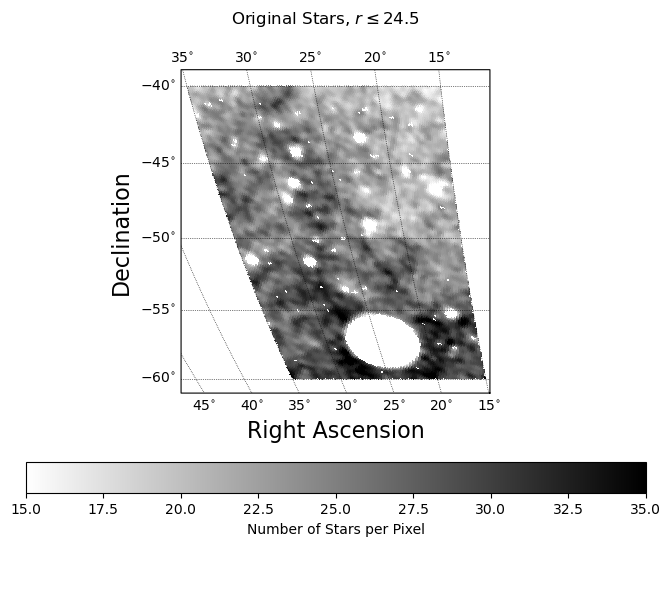

In [45]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
sp.draw_hspmap(hspStarOrig, cmap = 'gray_r')
plt.clim(starMin, starMax)
plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel')
fig.suptitle(r'Original Stars, $r\leq 24.5$')
plt.show()

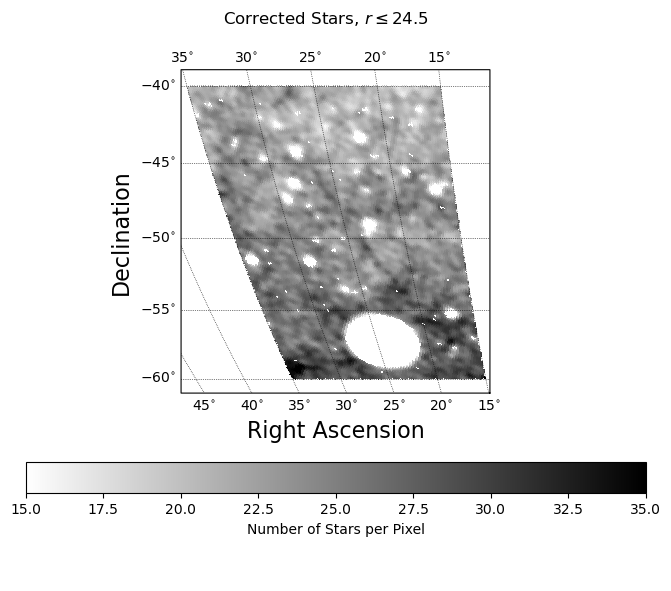

In [46]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax, gridlines = True)
sp.draw_hspmap(hspStarCorr, cmap = 'gray_r')
plt.clim(starMin, starMax)
plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel')
fig.suptitle(r'Corrected Stars, $r\leq 24.5$')
plt.show()

In [47]:
# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = False)
# sp.draw_hspmap(hspGalaOrig, cmap = 'inferno')
# plt.clim(galaMin, galaMax)
# plt.colorbar(location = 'bottom', label = 'Number of Galaxies per Pixel')
# fig.suptitle(r'Original Galaxies, $r\leq 24.5$')
# plt.show()

In [48]:
# # The default DES projection is a McBrydeSkymap.
# fig = plt.figure(1, figsize=(8, 6))
# ax = fig.add_subplot(111)
# sp = skyproj.DESSkyproj(ax=ax, gridlines = False)
# sp.draw_hspmap(hspGalaCorr, cmap = 'inferno')
# plt.clim(galaMin, galaMax)
# plt.colorbar(location = 'bottom', label = 'Number of Galaxies per Pixel')
# fig.suptitle(r'Corrected Galaxies, $r\leq 24.5$')
# plt.show()